In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *
# from iaml212cw2_my_helpers import *

In [2]:
X,Y=load_Q1_dataset()
print("X:", X.shape, "Y:", Y.shape)
Xtrn = X[100: ,:]; Ytrn = Y[100:] 
Xtst = X[0:100 ,:]; Ytst = Y[0:100]
print(X[2][0])

X: (800, 9) Y: (800,)
135.06


In [3]:
# Q1.1
def iaml212cw2_q1_1():
    xas = [] 
    xbs = [] 
    for i in range(9):
        tempa =[]
        tempb =[]
        for j in range(len(Y)):
            if Y[j] == 0:
                tempa.append(X[j][i])
            if Y[j] == 1:
                tempb.append(X[j][i])
        xas.append(tempa)
        xbs.append(tempb)
        
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.title("A"+str(i))
        plt.grid()
        plt.tight_layout()
        plt.hist([xas[i],xbs[i]],bins=15,label=["class0","class1"])
        plt.legend(loc=1)
    plt.show()


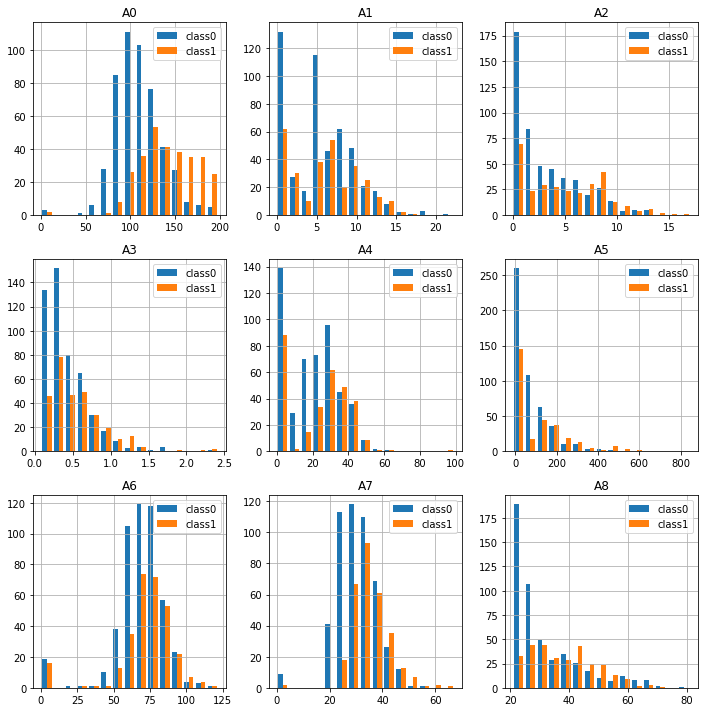

In [4]:
iaml212cw2_q1_1()   # comment this out when you run the function

In [5]:
# Q1.2
def iaml212cw2_q1_2():
    r=[]
    for i in range(9):
        r.append(np.corrcoef(Xtrn[:,i], Ytrn)[0,1])
    return r

In [6]:
iaml212cw2_q1_2()   # comment this out when you run the function

[0.49117589690804586,
 0.08740589845788765,
 0.2272871915395838,
 0.2073660529898688,
 0.10772034997696235,
 0.1856714007677247,
 0.07626074493410927,
 0.3044537676199448,
 0.24034733335192413]

In [7]:
# Q1.3
def iaml212cw2_q1_3():
    return null 
# iaml212cw2_q1_3()   # comment this out when you run the function

In [15]:
# Q1.4
def iaml212cw2_q1_4():
    unbiased = []
    attribute = ['A5','A0','A6','A4','A8','A7','A1','A2','A3']
    for i in range(9):
        unbiased.append(np.var(Xtrn[:,i], ddof=1)) 
    unbiased.sort(reverse=True)
    print(unbiased)
    print("sum of variences",sum(unbiased))
    cumulative = []
    count = 0
    for i in range(9):
        count=count + unbiased[i]
        cumulative.append(count)
    cumulative = cumulative/sum(unbiased)
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.title("unbiased varience")
    plt.grid()
    plt.xlabel('Attribute')
    plt.ylabel('Sum of variance')
    plt.bar(range(len(unbiased)), unbiased,tick_label=attribute)
    plt.subplot(1,2,2)
    plt.title("cumulative variance ratio")
    plt.xlabel('Number of attribute')
    plt.ylabel('Cumulative variance ratio')
    plt.grid()
    plt.plot(attribute, cumulative,marker="o")

In [13]:
unbiased = []
for i in range(9):
    unbiased.append((np.var(Xtrn[:,i], ddof=1),"A"+str(i)))
unbiased.sort(reverse=True)
print(unbiased)

[(14769.0983163317, 'A5'), (1006.4338305628447, 'A0'), (384.4417023511138, 'A6'), (254.1050424860004, 'A4'), (139.6276958847333, 'A8'), (63.50469851134274, 'A7'), (16.72342727243, 'A1'), (11.595970953402821, 'A2'), (0.10591536868996523, 'A3')]


[14769.0983163317, 1006.4338305628447, 384.4417023511138, 254.1050424860004, 139.6276958847333, 63.50469851134274, 16.72342727243, 11.595970953402821, 0.10591536868996523]
sum of variences 16645.63659972226


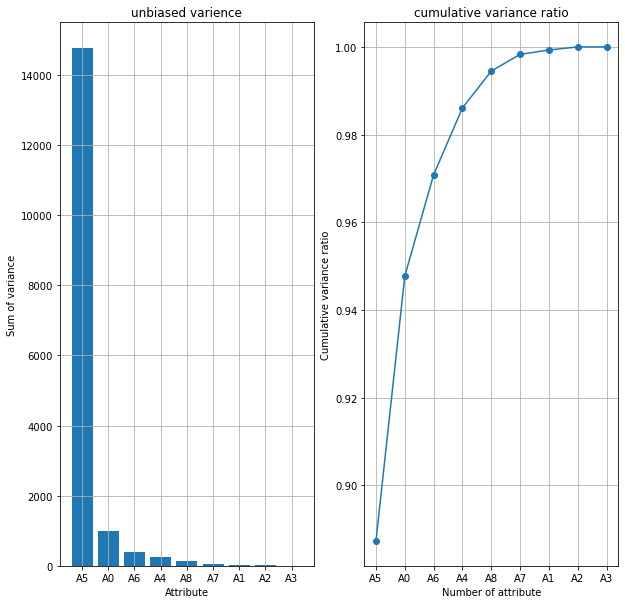

In [16]:
iaml212cw2_q1_4()   # comment this out when you run the function

In [10]:
# Q1.5
from sklearn.decomposition import PCA
def iaml212cw2_q1_5():
    pca = PCA()
    pca.fit(Xtrn)
    explained_variance_ratio = pca.explained_variance_ratio_
    explained_variance = pca.explained_variance_
    print("total explained variance: ")
    print(sum(explained_variance))
    #b
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.title("unbiased varience")
    plt.xlabel('PCs')
    plt.ylabel('Sum of variance')
    plt.grid()
    plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],explained_variance)
    plt.subplot(1,2,2)
    plt.title("cumulative variance ratio")
    plt.grid()
    plt.xlabel('Number of PC')
    plt.ylabel('Cumulative variance ratio')
    plt.plot(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],explained_variance_ratio.cumsum(),marker='o')
    #c
    norm_X = Xtrn - np.mean(Xtrn,axis=0)
    scatter_matrix = np.dot(np.transpose(norm_X),norm_X) 
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [((eig_val[i]), eig_vec[:, i]) for i in range(X.shape[1])]
    eig_pairs.sort(reverse=True)
    dim_re_matrix = np.array([ele[1] for ele in eig_pairs[:2]])
    Xtrn_2D = np.dot(norm_X,(pca.components_.T))
    #Xtrn_2D=pca.transform(Xtrn)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.scatter(Xtrn_2D[Ytrn == 0, 0], Xtrn_2D[Ytrn == 0, 1], alpha=.5, label='class0', c='blue')
    plt.scatter(Xtrn_2D[Ytrn == 1, 0], Xtrn_2D[Ytrn == 1, 1], alpha=.5, label='class1', c='red')
    plt.axis('equal')
    plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
    plt.title('Labelled data in PCA space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    top_plot = plt.gca()
    plt.show()
    #d
    r1=[]
    for i in range(9):
        r1.append(np.corrcoef(Xtrn[:,i], Xtrn_2D[:,0])[0,1])
    r2=[]
    for i in range(9):
        r2.append(np.corrcoef(Xtrn[:,i], Xtrn_2D[:,1])[0,1])
    print(r1)
    print(r2)
      

total explained variance: 
16645.636599722264


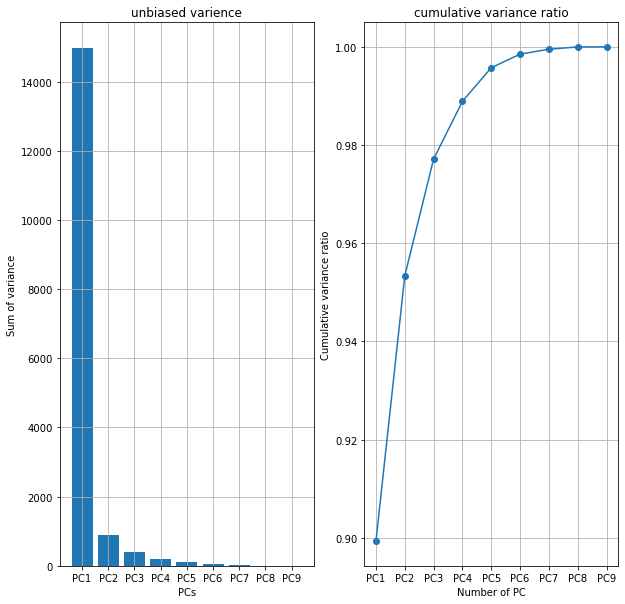

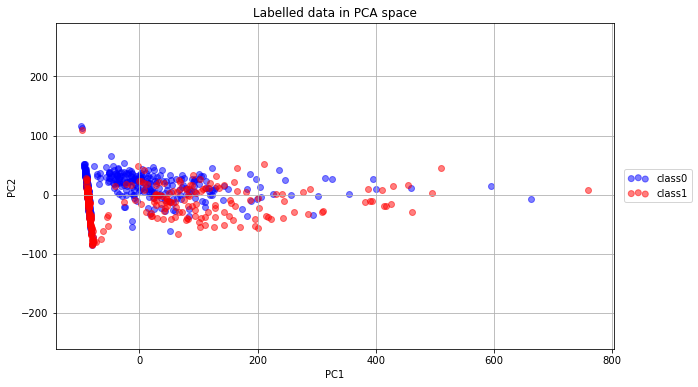

[0.3855930142069003, -0.04582516082225113, -0.0570515051364167, 0.18579338880949567, 0.45924021835727846, 0.9996780135176875, 0.10057182197062053, 0.23230210476652127, -0.0015740705358918503]
[-0.9142889454225337, -0.09077312003733055, -0.22546263478229112, -0.07987177012105025, 0.0971645653932255, 0.024084687085466922, -0.2553920087660299, -0.1726064402898436, -0.37344376883126895]


In [11]:
iaml212cw2_q1_5()   # comment this out when you run the function

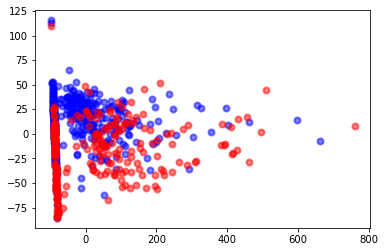

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(Xtrn)
Xtrn_2D=pca.transform(Xtrn)
plt.scatter(Xtrn_2D[Ytrn == 0, 0], Xtrn_2D[Ytrn == 0, 1], alpha=.5, lw=2, label='class0', c='blue')
plt.scatter(Xtrn_2D[Ytrn == 1, 0], Xtrn_2D[Ytrn == 1, 1], alpha=.5, lw=2, label='class1', c='red')

In [17]:
from sklearn . preprocessing import StandardScaler 
scaler = StandardScaler (). fit (Xtrn)
Xtrn_s = scaler.transform(Xtrn) # standardised training data 
Xtst_s = scaler.transform(Xtst) # standardised test data


In [14]:
#Q1.6
def iaml212cw2_q1_6():
    pca = PCA()
    pca.fit(Xtrn_s)
    explained_variance_ratio = pca.explained_variance_ratio_
    explained_variance = pca.explained_variance_
    print("total explained variance: ")
    print(sum(explained_variance))
    #b
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.title("unbiased varience")
    plt.grid()
    plt.xlabel('PC')
    plt.ylabel('Sum of variance')
    plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],explained_variance)
    plt.subplot(1,2,2)
    plt.title("cumulative variance ratio")
    plt.grid()
    plt.xlabel('Number of PC')
    plt.ylabel('Cumulative variance ratio')
    plt.plot(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],explained_variance_ratio.cumsum(),color='red',marker='o')
    #c
    norm_X = Xtrn_s - np.mean(Xtrn_s,axis=0)
    scatter_matrix = np.dot(np.transpose(norm_X),norm_X) 
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [((eig_val[i]), eig_vec[:, i]) for i in range(X.shape[1])]
    eig_pairs.sort(reverse=True)
    dim_re_matrix = np.array([ele[1] for ele in eig_pairs[:2]])
    Xtrn_s_2D = np.dot(norm_X,np.transpose(dim_re_matrix))
    plt.figure(figsize=(12,8))
    plt.scatter(Xtrn_s_2D[Ytrn == 0, 0], Xtrn_s_2D[Ytrn == 0, 1], alpha=.5, lw=2, label='class0',c='blue')
    plt.scatter(Xtrn_s_2D[Ytrn == 1, 0], Xtrn_s_2D[Ytrn == 1, 1], alpha=.5, lw=2, label='class1',c='red')
    plt.axis('equal')
    plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
    plt.title('Labelled data in PCA space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    top_plot = plt.gca()
    plt.show()
    #d
    r1=[]
    for i in range(9):
        r1.append(np.corrcoef(Xtrn[:,i], Xtrn_s_2D[:,0])[0,1])
    r2=[]
    for i in range(9):
        r2.append(np.corrcoef(Xtrn[:,i], Xtrn_s_2D[:,1])[0,1])
    print(r1)
    print(r2)
      

total explained variance: 
9.012875536480692


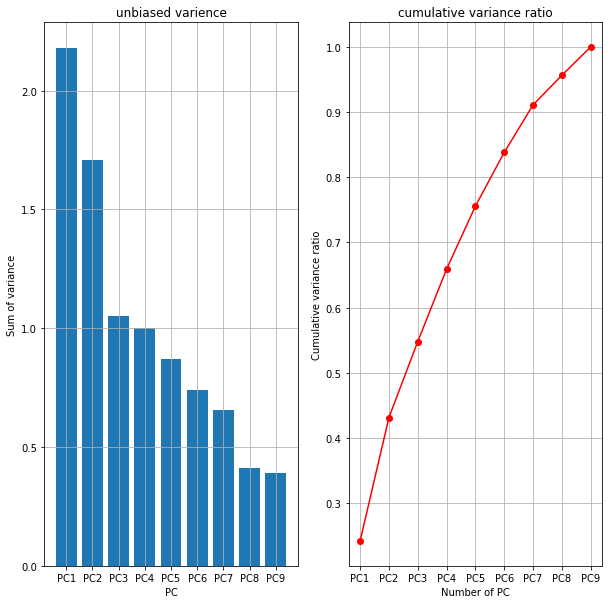

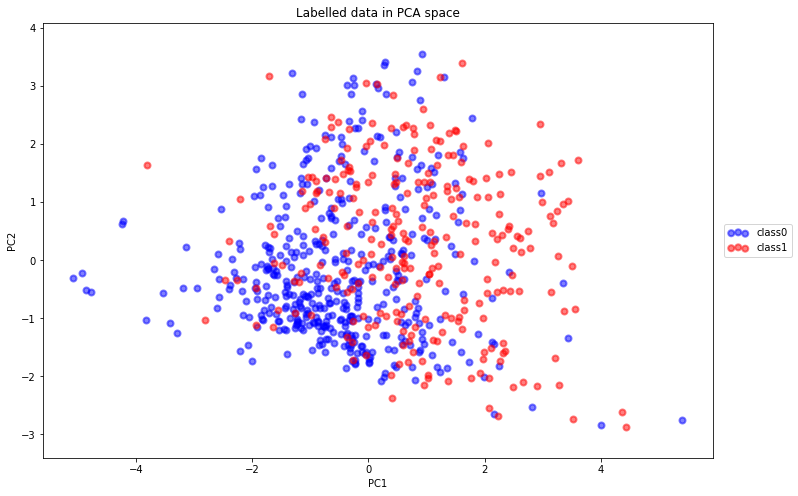

[0.6006713897085354, 0.05729590985040091, 0.2679520322311993, 0.36565546513764297, 0.6230382061060188, 0.62985685484088, 0.5228507215944558, 0.6511607443951049, 0.35286443238025345]
[0.17743225164360046, 0.10003686429568888, 0.7599827142218688, -0.20764337153009496, -0.4659904204832901, -0.3697958669372586, 0.22422808654293236, -0.1684495099450361, 0.7812491257116686]


In [15]:
iaml212cw2_q1_6() 

In [29]:
# Q1.8

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
def iaml212cw2_q1_8():
    std_tst=[]
    scores_tst = []
    std_trn = []
    scores_trn= []
    scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro')}
    c = np.logspace(-2, 2, 13)
    for i in c:
        print('c: ', i)
        svc_ = SVC(C = i)
        values = cross_validate(svc_, Xtrn_s, Ytrn, cv=5,return_train_score=True,scoring='accuracy')
        #print(values)
        mean_trn = np.mean(values['train_score'])
        std_tr=np.std(values['train_score'])
        std_trn.append(std_tr)
        scores_trn.append(mean_trn)
        #this_scores = cross_val_score(svc_, Xtrn_s, Ytrn, cv=5)
        print('mean: ', np.mean(values['test_score']))
        scores_tst.append(np.mean(values['test_score']))
        std_tst.append(np.std(values['test_score']))

    
    plt.figure(figsize=(8,5))
    plt.errorbar(c,scores_tst,yerr=std_tst,capsize=4,label='test')
    plt.errorbar(c,scores_trn,yerr=std_trn,ecolor='slategrey',capsize=4,label='train')
    plt.grid(True)
    plt.xscale('log')
    plt.title('Cross-validated classification accuracy against parameter c')
    plt.xlabel('Parameter c')
    plt.ylabel('Accuracy')
    plt.legend(fontsize=10)
    #c = np.logspace(-2, 2, 13)
    optimal_c = 0.464
    svc_classifier = SVC(C = optimal_c,kernel="rbf", gamma ='auto')
    svc_classifier.fit(Xtrn_s, Ytrn)

 




    

c:  0.01
mean:  0.6257142857142857
c:  0.021544346900318832
mean:  0.6257142857142857
c:  0.046415888336127774
mean:  0.6428571428571428
c:  0.1
mean:  0.7485714285714286
c:  0.21544346900318834
mean:  0.76
c:  0.46415888336127775
mean:  0.7742857142857142
c:  1.0
mean:  0.7685714285714286
c:  2.154434690031882
mean:  0.7614285714285715
c:  4.6415888336127775
mean:  0.7457142857142857
c:  10.0
mean:  0.75
c:  21.54434690031882
mean:  0.72
c:  46.41588833612777
mean:  0.72
c:  100.0
mean:  0.7214285714285714


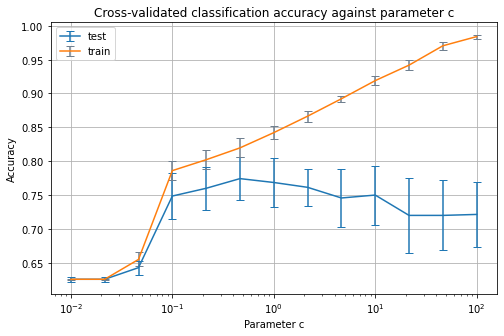

In [30]:
iaml212cw2_q1_8() 

when c is 0.464, the model have max accuracy 0.774.before the value of c reaching 0.464, when the value of c increases, the accuracy increases, after the value of c reaches 0.464, when value c increases, the accuracy of the model decreases. 75

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
optimal_c = 0.2155
svc_classifier = SVC(C = optimal_c,kernel="rbf", gamma ='auto')
svc_classifier.fit(Xtrn_s, Ytrn)
print(svc_classifier.score(Xtst_s,Ytst))

0.77


In [30]:
from scipy.stats import multivariate_normal
def iaml212cw2_q1_9():
    A4=[]
    A7=[]
    for i in range(len(Ytrn)):
        if Ytrn[i]==0 and Xtrn[i][4]>=1:
            A4.append(Xtrn[i][4])
            A7.append(Xtrn[i][7])
    Ztrn = np.concatenate(([A4],[A7]),axis=0)
    print(Ztrn.shape)
    print(np.min(A4),np.max(A4))
    print(np.min(A7),np.max(A7))
    z_mean=np.mean(Ztrn,axis=1)
    z_cov=np.cov(Ztrn[0],Ztrn[1])
    print(z_mean)
    print(z_cov)
    x=np.linspace(-5,60,400)
    y=np.linspace(-5,60,400)
    mesh_a,mesh_b=np.meshgrid(x,y)
    pos=np.dstack([mesh_a,mesh_b])
    mn=multivariate_normal(z_mean, z_cov)
    Z=mn.pdf(pos)
    plt.title('Contour')
    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.grid()
    plt.scatter(Ztrn[0],Ztrn[1])
    plt.contour(x,y,Z)

(2, 318)
7.73 53.92
0.0 52.29
[27.0209434  31.09320755]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


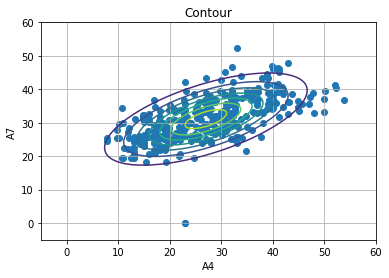

In [31]:
iaml212cw2_q1_9()

In [39]:
from scipy.stats import multivariate_normal
def iaml212cw2_q1_10():
    A4=[]
    A7=[]
    for i in range(len(Ytrn)):
        if Ytrn[i]==0 and Xtrn[i][4]>=1:
            A4.append(Xtrn[i][4])
            A7.append(Xtrn[i][7])
    Ztrn = np.concatenate(([A4],[A7]),axis=0)
    z_mean=np.mean(Ztrn,axis=1)
    z_cov=np.cov(Ztrn[0],Ztrn[1])
    z_cov_nb=np.diagonal(z_cov)

    print(z_mean)
    print(z_cov_nb)
    x=np.linspace(-5,60,400)
    y=np.linspace(-5,60,400)
    mesh_a,mesh_b=np.meshgrid(x,y)
    pos=np.dstack([mesh_a,mesh_b])
    mn=multivariate_normal(z_mean, z_cov_nb)
    Z=mn.pdf(pos)
    plt.title('naive-Bayes Contour')
    plt.xlabel('A4')
    plt.ylabel('A7')
    plt.grid()
    plt.scatter(Ztrn[0],Ztrn[1])
    plt.contour(x,y,Z)

[27.0209434  31.09320755]
[95.14113475 46.69341618]


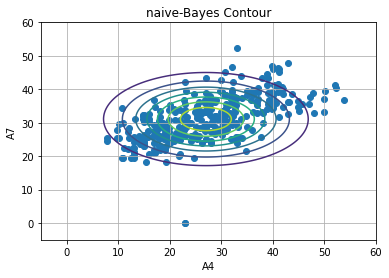

In [40]:
iaml212cw2_q1_10()